In [12]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time module.
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b48ac97ac693ad65e8d5f617f1b051ed


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | katsuura
Processing Record 2 of Set 12 | nguiu
City not found. Skipping...
Processing Record 3 of Set 12 | saskylakh
Processing Record 4 of Set 12 | mahebourg
Processing Record 5 of Set 12 | cavalcante
Processing Record 6 of Set 12 | tiksi
Processing Record 7 of Set 12 | ushuaia
Processing Record 8 of Set 12 | hilo
Processing Record 9 of Set 12 | rundu
Processing Record 10 of Set 12 | nikolskoye
Processing Record 11 of Set 12 | victoria
Processing Record 12 of Set 12 | lompoc
Processing Record 13 of Set 12 | kuche
City not found. Skipping...
Processing Record 14 of Set 12 | busselton
Processing Record 15 of Set 12 | nanortalik
Processing Record 16 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 12 | bluff
Processing Record 19 of Set 12 | mecca
Processing Record 20 of Set 12 | shushenskoye


Processing Record 31 of Set 15 | los llanos de aridane
Processing Record 32 of Set 15 | castro
Processing Record 33 of Set 15 | cayenne
Processing Record 34 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 35 of Set 15 | dunhua
Processing Record 36 of Set 15 | farafangana
Processing Record 37 of Set 15 | lorengau
Processing Record 38 of Set 15 | zyryanka
Processing Record 39 of Set 15 | cherskiy
Processing Record 40 of Set 15 | kakonko
Processing Record 41 of Set 15 | makubetsu
Processing Record 42 of Set 15 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 15 | kozhevnikovo
Processing Record 44 of Set 15 | kabalo
Processing Record 45 of Set 15 | weligama
Processing Record 46 of Set 15 | mwense
Processing Record 47 of Set 15 | olafsvik
Processing Record 48 of Set 15 | shymkent
Processing Record 49 of Set 15 | riyadh
Processing Record 50 of Set 15 | berdigestyakh
Processing Record 1 of Set 16 | port lincoln
Processing Record 2 of Set 16 | cabo san 

Processing Record 15 of Set 19 | hwange
Processing Record 16 of Set 19 | wulanhaote
City not found. Skipping...
Processing Record 17 of Set 19 | sangar
Processing Record 18 of Set 19 | callaway
Processing Record 19 of Set 19 | malpe
Processing Record 20 of Set 19 | kurchum
Processing Record 21 of Set 19 | beloha
Processing Record 22 of Set 19 | chitungwiza
Processing Record 23 of Set 19 | inuvik
Processing Record 24 of Set 19 | zhuozhou
City not found. Skipping...
Processing Record 25 of Set 19 | bartica
Processing Record 26 of Set 19 | pisco
Processing Record 27 of Set 19 | merauke
Processing Record 28 of Set 19 | cotonou
Processing Record 29 of Set 19 | iquitos
Processing Record 30 of Set 19 | inirida
Processing Record 31 of Set 19 | deputatskiy
Processing Record 32 of Set 19 | mount isa
Processing Record 33 of Set 19 | nishihara
Processing Record 34 of Set 19 | fort nelson
Processing Record 35 of Set 19 | chadiza
Processing Record 36 of Set 19 | port macquarie
Processing Record 37 o

Processing Record 3 of Set 23 | boa vista
Processing Record 4 of Set 23 | agadez
Processing Record 5 of Set 23 | turkistan
Processing Record 6 of Set 23 | sterling
Processing Record 7 of Set 23 | ardakan
Processing Record 8 of Set 23 | hervey bay
Processing Record 9 of Set 23 | virginia beach
Processing Record 10 of Set 23 | tazovskiy
Processing Record 11 of Set 23 | lasa
Processing Record 12 of Set 23 | notse
Processing Record 13 of Set 23 | kaeo
Processing Record 14 of Set 23 | malanje
Processing Record 15 of Set 23 | wilmington
Processing Record 16 of Set 23 | dukat
Processing Record 17 of Set 23 | lakes entrance
Processing Record 18 of Set 23 | aflu
City not found. Skipping...
Processing Record 19 of Set 23 | pringsewu
Processing Record 20 of Set 23 | trairi
Processing Record 21 of Set 23 | port blair
Processing Record 22 of Set 23 | taybad
Processing Record 23 of Set 23 | moussoro
Processing Record 24 of Set 23 | sao joao del rei
Processing Record 25 of Set 23 | coahuayana
Process

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.13,140.30,48.99,61,75,9.17,JP,2020-02-19 11:25:37
1,Saskylakh,71.92,114.08,-6.59,92,0,8.48,RU,2020-02-19 11:25:38
2,Mahebourg,-20.41,57.70,84.20,62,75,12.75,MU,2020-02-19 11:25:38
3,Cavalcante,-13.80,-47.46,71.78,72,95,5.35,BR,2020-02-19 11:25:39
4,Tiksi,71.69,128.87,-8.00,87,100,7.90,RU,2020-02-19 11:25:39
5,Ushuaia,-54.80,-68.30,44.60,81,75,29.97,AR,2020-02-19 11:25:39
6,Hilo,19.73,-155.09,69.80,83,90,5.82,US,2020-02-19 11:25:41
7,Rundu,-17.93,19.77,83.46,60,75,7.34,NA,2020-02-19 11:25:41
8,Nikolskoye,59.70,30.79,41.00,75,75,15.66,RU,2020-02-19 11:25:41
9,Victoria,22.29,114.16,68.00,45,5,9.17,HK,2020-02-19 11:22:45


In [8]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2020-02-19 11:25:37,35.13,140.30,48.99,61,75,9.17
1,Saskylakh,RU,2020-02-19 11:25:38,71.92,114.08,-6.59,92,0,8.48
2,Mahebourg,MU,2020-02-19 11:25:38,-20.41,57.70,84.20,62,75,12.75
3,Cavalcante,BR,2020-02-19 11:25:39,-13.80,-47.46,71.78,72,95,5.35
4,Tiksi,RU,2020-02-19 11:25:39,71.69,128.87,-8.00,87,100,7.90
...,...,...,...,...,...,...,...,...,...
543,Nenjiang,CN,2020-02-19 11:30:37,49.18,125.22,11.03,93,45,7.00
544,Casablanca,MA,2020-02-19 11:30:37,33.59,-7.62,62.60,67,75,6.93
545,Metro,ID,2020-02-19 11:30:38,-5.11,105.31,79.86,85,90,8.25
546,Nyurba,RU,2020-02-19 11:30:38,63.28,118.33,-4.11,98,28,5.68


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

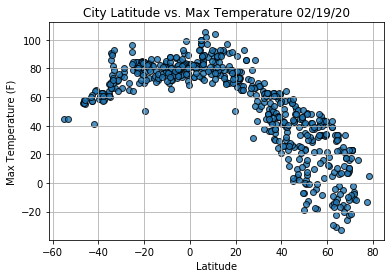

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

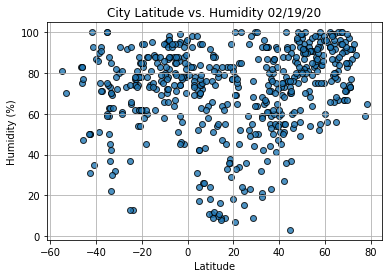

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

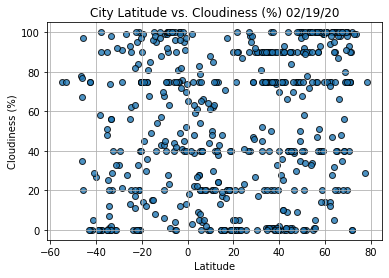

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

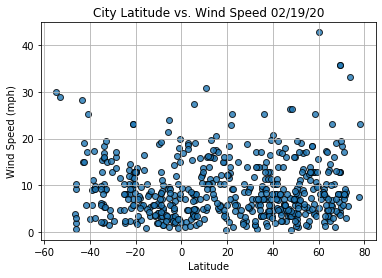

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()